<a href="https://colab.research.google.com/github/sonicfsw/Check_ULP-R-_722-1/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

* Импортировать данные из kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance
* Сделать краткий EDA
* Подготовить данные (пропущенные значения, кодировка)
* Использовать классические алгоритмы машинного обучения для прогнозирования затрат (charges) на основе регрессии на датасете и собрать метрики: оценки RMSE, MSE, R2, MAE на тестовом наборе
* Подобрать гиперпараметры для одной из моделей машинного обучения, обучить и собрать метрики: оценки RMSE, MSE, R2, MAE на тестовом наборе

Описание данных:

* age: Возраст

* sex: Пол

* bmi: Индекс массы тела

* children: Количество детей

* smoker: Является курильщиком (да/нет)

* region: Регион проживания в США

* charges: Затраты на медицинские услуги

# Данные

In [ ]:
import pandas as pd
import sklearn
import numpy
import matplotlib.pyplot as plt

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 16.4MB/s]


In [ ]:
!unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [ ]:
df = pd.read_csv('insurance.csv')

# EDA

In [ ]:
!pip install ydata_profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.6 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summary:

* пропусков нет
* один дубликат
* типы данных совпали, но нужно кодирование

Краткие выводы по данным:
* доля людей до 20 выше, чем за аналогичные промежутки других возрастов
* соотношение по полу примерно одинаковое
* больше половины людей имеют ИМТ > 30, что соответствует ожирению
* примерно 40% бездетные
* некурящих гораздо больше, чем курящих
* распределение по регионам примерно одинаковое
* основная доля трат - до 12000$

Корреляции и интеракции:
* сильная корреляция - курильщики тратят больше
* средняя корреляция - траты растут по мере увеличения возраста. На карте интеракций такая связь явна видна до 2000$
* ИМТ > 25 сильнее заметен у людей до 20 лет включительно. Однако и данных по людям до 20-ти лет больше.
* бездетные - часто люди около 20-ти лет или около 60-ти лет

Но курильщиков мало - посмотрим на распределение трат:

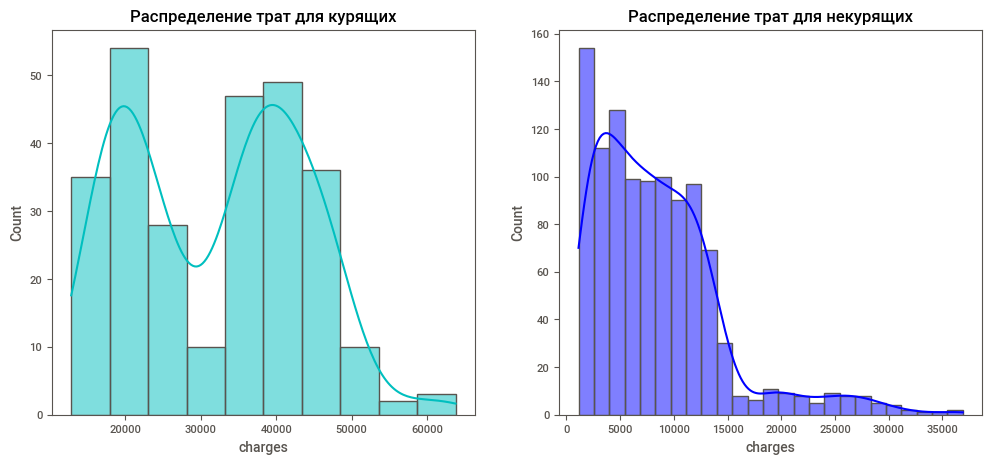

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
sns.histplot(df[df.smoker == 'yes']["charges"], color='c', kde=True, ax=ax)
ax.set_title('Распределение трат для курящих')

ax = fig.add_subplot(122)
sns.histplot(df[(df.smoker == 'no')]['charges'], color='b', kde=True, ax=ax)
ax.set_title('Распределение трат для некурящих')

fig.show()

Вывод: курящих мало (вывод выше) и в среднем тратят гораздо больше из-за курения - пиковые чеки на 20000 долларов и на 40000$.

Посмотрим на распределение курящих и некурящих по возрасту:

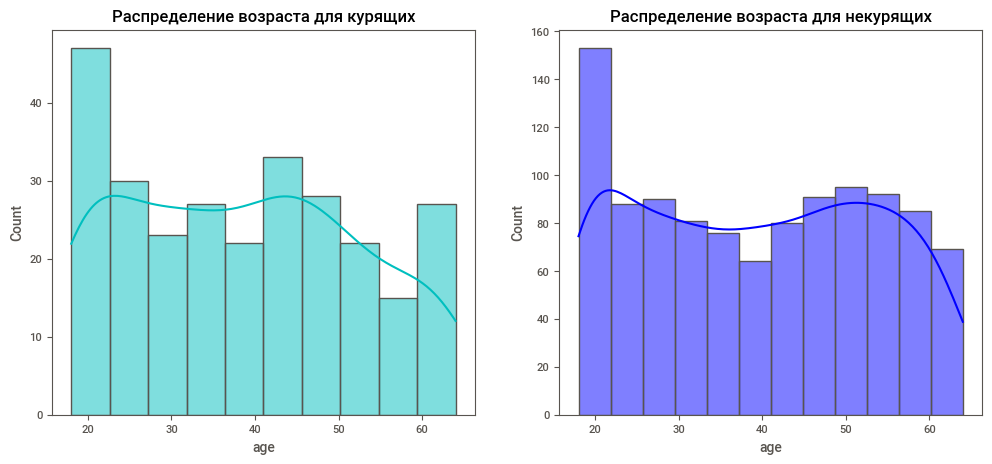

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
sns.histplot(df[df.smoker == 'yes']["age"], color='c', kde=True, ax=ax)
ax.set_title('Распределение возраста для курящих')

ax = fig.add_subplot(122)
sns.histplot(df[(df.smoker == 'no')]['age'], color='b', kde=True, ax=ax)
ax.set_title('Распределение возраста для некурящих')

fig.show()

Вывод: помня о том, что данных о молоды людях 20-тилетнего возраста больше, видим, что по распределению (density, линия) курящих молодых не больше, чем людей более старшего возраста.

Также посмотрим на распределение ИМТ по возрастным группам:

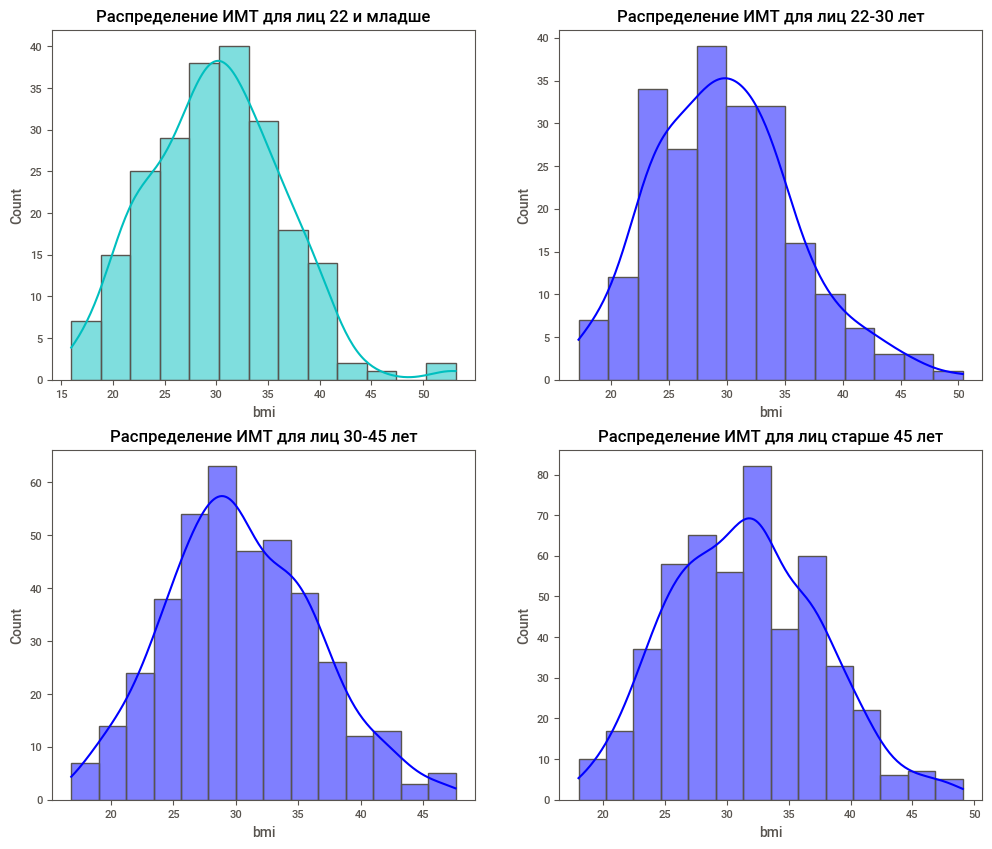

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(221)
sns.histplot(df[df.age <=22]["bmi"], color='c', kde=True, ax=ax)
ax.set_title('Распределение ИМТ для лиц 22 и младше')

ax = fig.add_subplot(222)
sns.histplot(df[(df.age >22) & (df.age <= 30)]["bmi"], color='b', kde=True, ax=ax)
ax.set_title('Распределение ИМТ для лиц 22-30 лет')

ax = fig.add_subplot(223)
sns.histplot(df[(df.age >30) &  (df.age <= 45)]["bmi"], color='b', kde=True, ax=ax)
ax.set_title('Распределение ИМТ для лиц 30-45 лет')

ax = fig.add_subplot(224)
sns.histplot(df[df.age >45]["bmi"], color='b', kde=True, ax=ax)
ax.set_title('Распределение ИМТ для лиц старше 45 лет')

fig.show()

Вывод: от возраста к возрасту картинка не очень меняется - мода всегда в районе 30 пунктов (30-35 - ожирение первой степени), но в возрасте 45 и старше ИМТ сдвигается ближе к 35.

# Кодируем данные

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_gender = OneHotEncoder(sparse_output = False)

gender_df = pd.DataFrame(ohe_gender.fit_transform(df[['sex']]))
gender_df.columns = ohe_gender.get_feature_names_out()

# объединяем датафреймы
df = df.join(gender_df.set_index(df.index))

# удаляем исходный столбец
df.drop('sex', axis = 1, inplace = True)
df.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1.0,0.0
1,18,33.770,1,no,southeast,1725.55230,0.0,1.0
2,28,33.000,3,no,southeast,4449.46200,0.0,1.0
3,33,22.705,0,no,northwest,21984.47061,0.0,1.0
4,32,28.880,0,no,northwest,3866.85520,0.0,1.0


In [ ]:
ohe_smoker = OneHotEncoder(sparse_output = False)

smoker_df = pd.DataFrame(ohe_smoker.fit_transform(df[['smoker']]))
smoker_df.columns = ohe_smoker.get_feature_names_out()

# объединяем датафреймы
df = df.join(smoker_df.set_index(df.index))

# удаляем исходный столбец
df.drop('smoker', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder_region = LabelEncoder()

df['region'] = encoder_region.fit_transform(df['region'])
df

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,3,16884.92400,1.0,0.0,0.0,1.0
1,18,33.770,1,2,1725.55230,0.0,1.0,1.0,0.0
2,28,33.000,3,2,4449.46200,0.0,1.0,1.0,0.0
3,33,22.705,0,1,21984.47061,0.0,1.0,1.0,0.0
4,32,28.880,0,1,3866.85520,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,0.0,1.0,1.0,0.0
1334,18,31.920,0,0,2205.98080,1.0,0.0,1.0,0.0
1335,18,36.850,0,2,1629.83350,1.0,0.0,1.0,0.0
1336,21,25.800,0,3,2007.94500,1.0,0.0,1.0,0.0


# Разделение на train и test

In [ ]:
X = df.drop('charges', axis = 1)
y = df[['charges']].copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Для градиентного спуска лучше нормализовать данные:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Линейная регрессия OLS и SGD

Задача - подобрать значения коэффициентов. Способы для определения коэффициентов регрессии разные: и метод наименьших квадратов (OLS, реализован в sklearn и statsmodels), и градиентный спуск (объяснения и разницу в методах можно найти [здесь](https://shakewingo.github.io/GD-vs-OLS/)).

LinearRegression использует метод наименьших квадратов и сумму квадратов отклонений (SSE, SSR, RSS - разные названия одной метрики в разной литературе) в качестве функции потерь, то есть минимизует её.

In [ ]:
from sklearn.linear_model import LinearRegression

# линейная регрессия на основе OLS
linear_model = LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

Напишем свою функцию для обучения и тестирования моделей. Возвращать будем несколько метрик - MSE, R2, MAE

In [ ]:
def model_train_test(X_train, y_train, X_test, y_test, model):
  """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param X_test: объекты тестовой выборки
  :param y_test: значения целевой переменной тестовой выборки
  :param model: модель, которая обучается и тестируется
  """
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = sqrt(mse)
  r2 = r2_score(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  print(f"MSE = {round(mse, 3)}; RMSE = {rmse}; R2 = {round(r2, 3)}; MAE = {round(mae, 3)}")

  return pred, mse, rmse, r2, mae, model

Обучаем для модели на основе OLS (МНК)

In [ ]:
pred_lr, mse_lr, rmse_lr, r2_lr, mae_lr, linear_model = model_train_test(
    X_train,
    y_train,
    X_test,
    y_test,
    linear_model
)

MSE = 33635210.431; RMSE = 5799.587091438356; R2 = 0.783; MAE = 4186.509


Обучаем модель на основе градиентного спуска:

In [ ]:
from sklearn.linear_model import SGDRegressor

# линейная регрессия через SGD
sgd_linear_model = SGDRegressor(penalty=None)

In [ ]:
pred_sgd_lr, mse_sgd_lr, rmse_sgd_lr, r2_sgd_lr, mae_sgd_lr, sgd_linear_model = model_train_test(
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    sgd_linear_model
)

MSE = 33604297.657; RMSE = 5796.921394776908; R2 = 0.784; MAE = 4150.249


# Ridge, Lasso и ElasticNet

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet(l1_ratio=0.8)

In [ ]:
pred_ridge, mse_ridge, rmse_ridge, r2_ridge, mae_ridge, ridge_model = model_train_test(
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    ridge
)

MSE = 33638699.235; RMSE = 5799.887864016139; R2 = 0.783; MAE = 4187.022


In [ ]:
pred_lasso, mse_lasso, rmse_lasso, r2_lasso, mae_lasso, lasso_model = model_train_test(
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    lasso
)

MSE = 33637843.328; RMSE = 5799.814077017643; R2 = 0.783; MAE = 4186.625


In [ ]:
pred_elastic, mse_elastic, rmse_elastic, r2_elastic, mae_elastic, elastic_model = model_train_test(
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    elastic
)

MSE = 35688916.291; RMSE = 5974.020111335788; R2 = 0.77; MAE = 4383.472


# Подбор гиперапараметров и оценка на кросс-валидации

Для начала поймём, в чём отличие параметров модели от гиперпараметров:

* параметры настраиваются в процессе обучения модели на данных. Например, веса в линейной регрессии, нейросетях, структура решающего дерева;
* гиперпараметры — это характеристики модели, которые фиксируются до начала обучения: глубина решающего дерева, значение силы регуляризации в линейной модели, learning rate для градиентного спуска.

Гиперпараметры играют важную роль в машинном обучении. Иногда бывает так, что гиперпараметры по умолчанию не позволяют модели обучаться, в то время как при определенной их комбинации качество модели значительно улучшается.

**GridSearchCV** – это инструмент для автоматического подбора параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры путем перебора: он создает модель для каждой возможной комбинации параметров.

Также введет новое понятие — **кросс-валидация**. Рассмотрим K-Fold кросс-валидацию — это метод для подбора гиперпараметров и оценки модели по следующему сценарию: данные для обучения разбиваются на несколько частей (k folds) и дублируются k раз. В каждом дубле один из k вариантов остается для оценки модели (не должны повторяться!), все остальные — для обучения. На каждом из наборов обучается и оценивается своя модель, и полученную оценку можно усреднить. Используя кросс-валидацию, мы измеряем, как хорошо модель с определенным набором гиперпараметров справляется с задачей на разных частях данных.

Про другие подходы к кросс-валидации обсудим в других модулях.

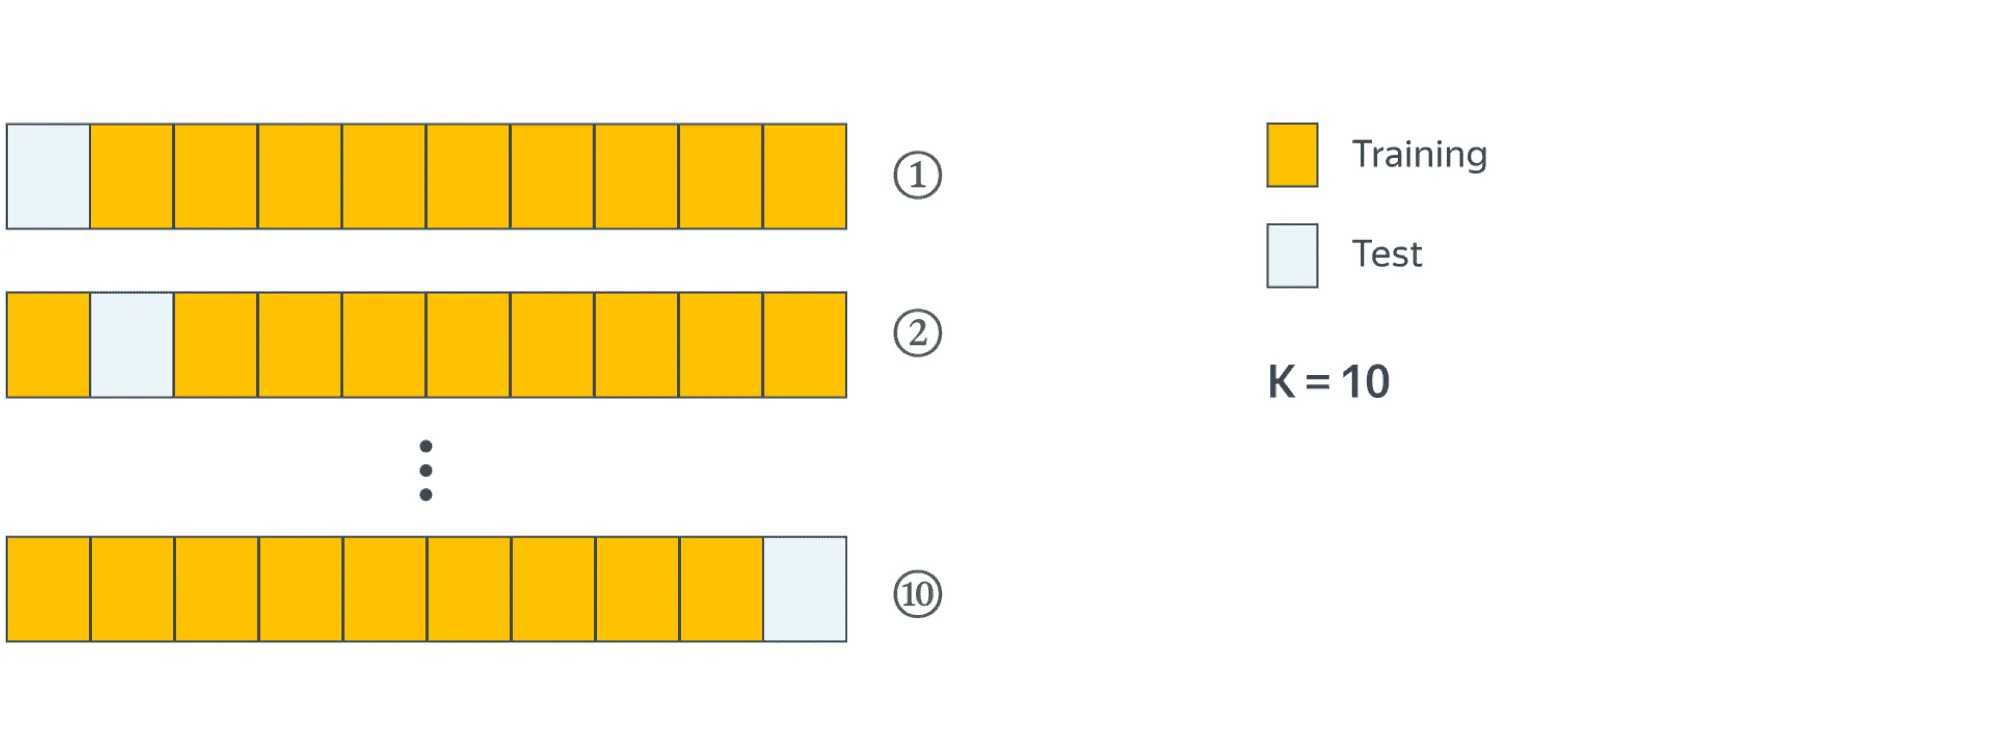

Напишем свою функцию для поиска наилучших гиперпараметров с использованием GridSearch:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def tune(model, params: dict, train_x, train_y):
  # В сетке поставили оценку по среднеквадративной ошибке - так она обозначается в документации
  grid = GridSearchCV(model, params, cv=3, scoring='neg_root_mean_squared_error')

  grid.fit(train_x, train_y)
  best_model = grid.best_estimator_
  print(f"Лучшие гиперпараметры: {grid.best_params_}")
  # смотрим значение метрики отрицательное - минус на минус даёт плюс
  print(f"Лучшая кросс-валидационная RMSE: {-grid.best_score_:.4f}")

  return best_model

Найдем оптимальные параметры для каждой простой модели:

In [ ]:
lr_params = {'fit_intercept': [True, False], 'positive': [True, False]}

best_lr = tune(LinearRegression(), lr_params, X_train, y_train)

Лучшие гиперпараметры: {'fit_intercept': True, 'positive': False}
Лучшая кросс-валидационная RMSE: 6160.0729


In [ ]:
sgd_params = {'loss': ['squared_error', 'huber'], 'penalty': ['l1', 'l2', None]}

best_sgd = tune(SGDRegressor(), sgd_params, X_train_scaled, y_train)

Лучшие гиперпараметры: {'loss': 'squared_error', 'penalty': 'l2'}
Лучшая кросс-валидационная RMSE: 6156.0230


In [ ]:
lasso_params = {'fit_intercept': [True, False], 'alpha': [0, 0.5, 1, 2, 3, 4]}

best_lasso = tune(Lasso(), lasso_params, X_train_scaled, y_train)

Лучшие гиперпараметры: {'alpha': 4, 'fit_intercept': True}
Лучшая кросс-валидационная RMSE: 6159.7252


In [ ]:
ridge_params = {'fit_intercept': [True, False], 'alpha': [0, 0.5, 1, 2, 3, 4]}

best_ridge = tune(Ridge(), ridge_params, X_train_scaled, y_train)

Лучшие гиперпараметры: {'alpha': 4, 'fit_intercept': True}
Лучшая кросс-валидационная RMSE: 6159.6405


In [ ]:
elastic_params = {'fit_intercept': [True, False], 'alpha': [0, 0.5, 1, 2, 3, 4], 'l1_ratio': [0, 0.2, 0.5, 0.8, 1]}

best_elastic = tune(ElasticNet(), elastic_params, X_train_scaled, y_train)

Лучшие гиперпараметры: {'alpha': 4, 'fit_intercept': True, 'l1_ratio': 1}
Лучшая кросс-валидационная RMSE: 6159.7252


Метрики на кросс-валидации могут ухудшаться!

После K-Fold кросс-валидации есть 3 варианта:
* использовать все полученные модели для предсказания и усреднять оценку
* выбрать наилучший вариант и использовать его
* заново обучить модель с лучшими параметрами на всех данных

# Получение предсказаний лучших вариантов

Также напишем самодельную функцию, которая вернет RMSE и предсказания:

In [ ]:
from math import sqrt

def custom_predict(model, X_test, y_test):
  pred = model.predict(X_test)
  rmse = sqrt(mean_squared_error(y_test, pred))

  return pred, rmse

In [ ]:
pred_lr, lr_rmse_best = custom_predict(best_lr, X_test, y_test)
pred_sgd, sgd_rmse_best = custom_predict(best_sgd, X_test_scaled, y_test)
pred_ridge, ridge_rmse_best = custom_predict(best_ridge, X_test_scaled, y_test)
pred_lasso, lasso_rmse_best = custom_predict(best_lasso, X_test_scaled, y_test)
pred_elastic, elastic_rmse_best = custom_predict(best_elastic, X_test_scaled, y_test)

data = {
    'model': ['Linear Regression', 'SGD Regressor', 'Lasso', 'Ridge', 'ElasticNet'],
    'RMSE Best Config': [lr_rmse_best, sgd_rmse_best, lasso_rmse_best, ridge_rmse_best, elastic_rmse_best],
    'RMSE Base Config': [rmse_lr, rmse_sgd_lr, rmse_lasso, rmse_ridge, rmse_elastic]
}

metrics = pd.DataFrame.from_dict(data)

## Сравнение по RMSE до и после подбора гиперпараметров

In [ ]:
metrics

,model,RMSE Best Config,RMSE Base Config
0,Linear Regression,5799.587091,5799.587091
1,SGD Regressor,5812.248108,5796.921395
2,Lasso,5800.501821,5799.814077
3,Ridge,5800.828791,5799.887864
4,ElasticNet,5800.501821,5974.020111


# Визуализируем предсказания

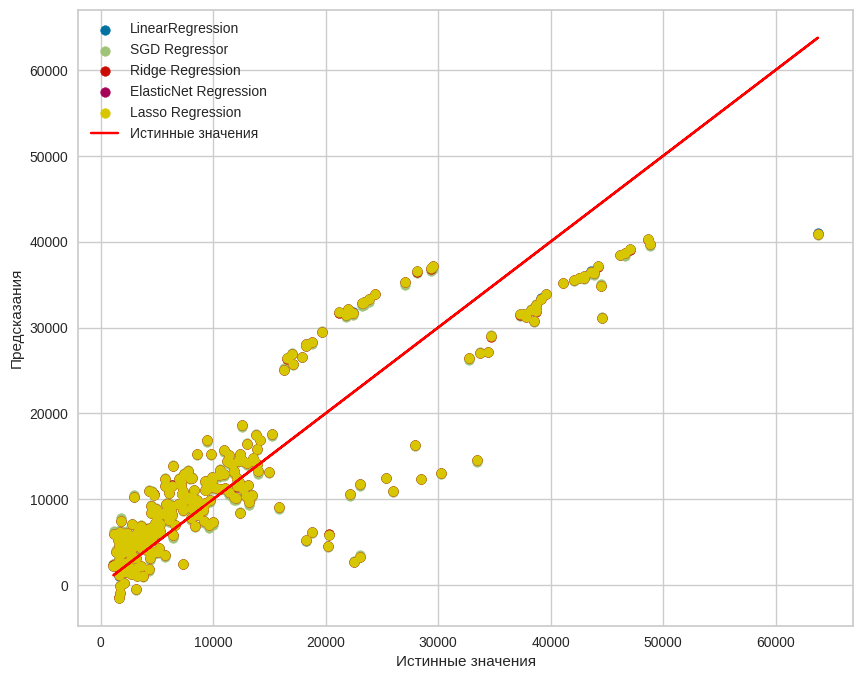

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=12) # далее во всех графиках будет использоваться такой же размер шрифта

plt.figure(figsize=(10, 8))

plt.scatter(y_test, pred_lr, label="LinearRegression")
plt.scatter(y_test, pred_sgd, label="SGD Regressor")
plt.scatter(y_test, pred_ridge, label="Ridge Regression")
plt.scatter(y_test, pred_elastic, label="ElasticNet Regression")
plt.scatter(y_test, pred_lasso, label="Lasso Regression")


plt.plot(y_test, y_test, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Предсказания");

# Дополнительное чтение - математика:

1. Математика OLS и GD для линейной регрессии: https://shakewingo.github.io/GD-vs-OLS/

2. Математика и геометрия OLS для линейной регрессии (раздел - интерпретация через столбцы - Columns Perspective): https://allmodelsarewrong.github.io/ols.html#geometries-of-ols

3. Ещё больше математики: https://gregorygundersen.com/blog/2020/01/04/ols/